In [3]:
import pandas as pd
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="c7fda53ffccb4ab0b86f8d8a747f04c3",
                                                           client_secret="05af511f7dfe4889b7e74e526e6464c4"))



In [4]:
df = pd.read_csv('C:\\Users\\gaszk\\Documents\\KAR\\SKRIPSHIT\\data\\data_skripsi.csv')


In [5]:
df.sample(10)

,Unnamed: 0,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
108,75,0.576,0.733,0.0288,0.00135,0.000215,0.1070,0.551,150.120
70,37,0.620,0.610,0.0373,0.00849,0.162000,0.2050,0.235,127.052
52,19,0.659,0.615,0.0644,0.27000,0.000000,0.1870,0.193,119.843
99,66,0.674,0.622,0.0746,0.57700,0.000046,0.1050,0.284,126.070
48,15,0.640,0.533,0.0706,0.11900,0.000000,0.0864,0.515,99.968
7,7,0.556,0.864,0.0584,0.00958,0.000000,0.2090,0.400,105.143
59,26,0.620,0.864,0.1140,0.03230,0.000000,0.1170,0.395,98.059
61,28,0.725,0.853,0.0516,0.30500,0.000000,0.1150,0.707,134.991
17,17,0.705,0.830,0.0403,0.22500,0.146000,0.1200,0.460,128.061
126,93,0.533,0.744,0.0575,0.46000,0.003460,0.5420,0.261,175.017


In [3]:
# Importing Modules untuk Notebook ini
import umap.umap_ as umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import tau_unsup as tau
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

In [10]:
X = df[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].values
#C = df['species'].values
print(X.shape)
df.sample(7)

(133, 8)


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
77,0.762,0.665,0.0471,0.16900,0.000000,0.1030,0.961,115.946
64,0.623,0.850,0.0334,0.00832,0.023700,0.2890,0.707,134.978
50,0.725,0.834,0.0370,0.07840,0.000013,0.0834,0.859,120.026
8,0.617,0.635,0.0317,0.04980,0.000014,0.1640,0.446,103.019
84,0.640,0.525,0.0557,0.03130,0.000000,0.3350,0.376,88.067
6,0.748,0.524,0.0338,0.41400,0.000000,0.1110,0.661,95.010
81,0.828,0.592,0.0447,0.14200,0.008090,0.0812,0.547,116.025


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


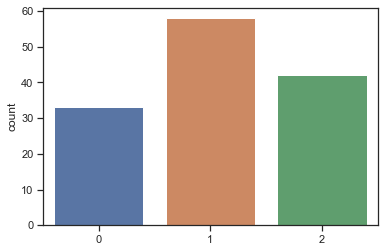

In [13]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, 
                    random_state = 99)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

In [ ]:
km.inertia_

Text(0.5, 1.0, 'Elbow curve')

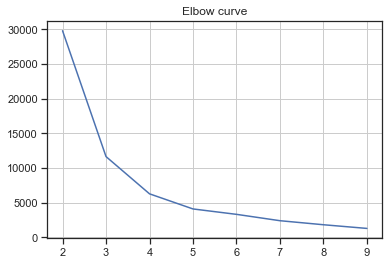

In [12]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
j#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

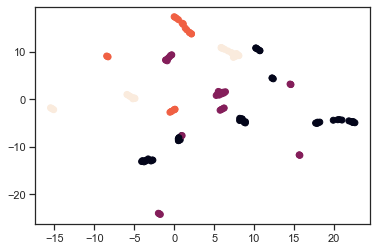

In [19]:
X2D = umap.UMAP(n_neighbors=3, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


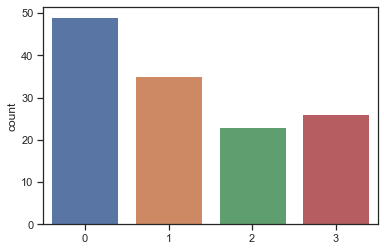

In [18]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
kk = 4
km = cluster.KMeans(n_clusters=kk, init='random', max_iter=300, tol=0.0001, 
                    random_state = 99)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

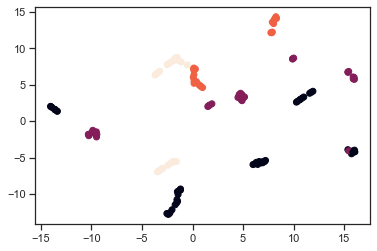

In [20]:
X2D = umap.UMAP(n_neighbors=4, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

In [24]:
df.to_csv('C:\\Users\\gaszk\\Documents\\KAR\\SKRIPSHIT\\data\\data_skripsi.csv')

In [1]:
df.sample(10)

NameError: name 'df' is not defined